# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

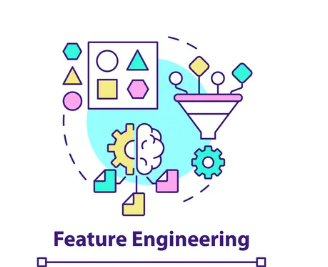

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [4]:
import pandas as pd
ndf = pd.read_csv('loan_train.csv')
ndf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [15]:
from sklearn.impute import SimpleImputer
numeric_cols=ndf.select_dtypes(include='number')
impute = SimpleImputer(strategy='mean')
data = impute.fit_transform(numeric_cols)

ndf= pd.DataFrame(data,columns=numeric_cols.columns)
ndf.isnull().sum()



ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

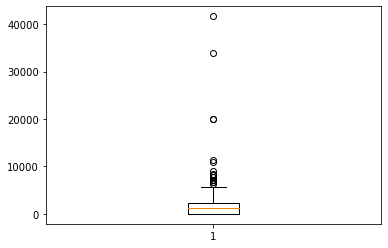

In [17]:
#Write your solution here

import matplotlib.pyplot as plt
plt.boxplot(ndf['CoapplicantIncome'])
plt.show()


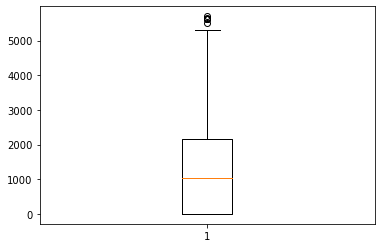

In [19]:
Q1 = ndf.CoapplicantIncome.quantile(0.25)
Q3 = ndf.CoapplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 +(IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df1 = ndf[(ndf.CoapplicantIncome > lowerlimit) & (ndf.CoapplicantIncome< upperlimit)]
df1.shape
plt.boxplot(df1['CoapplicantIncome'])
plt.show()

In [28]:
std = ndf.CoapplicantIncome.std()
mean = ndf.CoapplicantIncome.mean()
upperlimit = mean + ( 2 * std)
lowerlimit = mean -( 3* std)
df2 = ndf[(ndf.CoapplicantIncome > lowerlimit) & (ndf.CoapplicantIncome < upperlimit)]
df2.shape

(603, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

In [29]:
# Write your solution here
plt.hist(ndf.LoanAmount, bins=15)
plt.xlabel("Loan Amount")
plt.show()



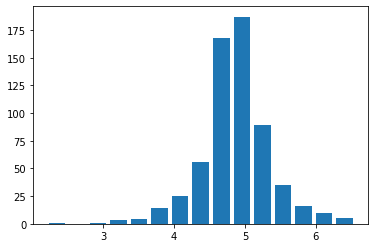

In [32]:
import numpy as np
x = np.log(ndf['LoanAmount'])
plt.hist(x, bins = 15, rwidth = 0.8)
plt.show()

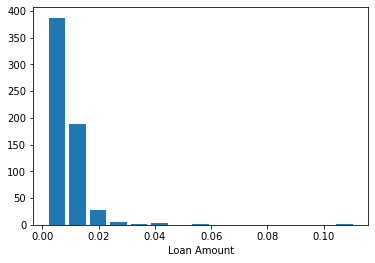

In [33]:
x= np.reciprocal(ndf.LoanAmount)
plt.hist(x,bins=15,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

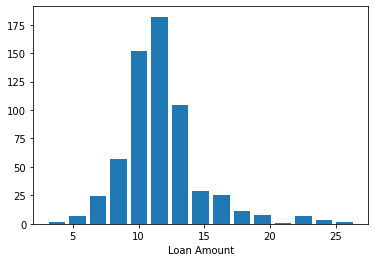

In [34]:
x = np.sqrt(ndf.LoanAmount)
plt.hist(x,bins=15,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

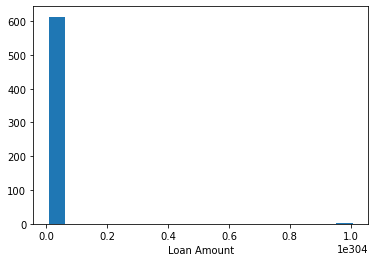

In [35]:
x = np.exp(ndf.LoanAmount)
plt.hist(x, bins =15, rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [47]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(df1)
df1 = pd.DataFrame(numeric,columns=ndf.columns) 
df1









ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.264515    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.413612    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
591         0.034014           0.000000    0.089725          0.743590   
592         0.048930           0.000000    0.044863          0.358974   
593         0.097984           0.042098    0.353111          0.743590   
594         0.091936           0.000000    0.257598          0.743590   
595         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
591             1.0  
592             1.0  
593             1.0  
594             1.0  
595             0.0  

[596 rows x 5 columns]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(df1)

standardf = pd.DataFrame(numeric, columns =ndf.columns )
standardf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072613          -0.882664    0.042849          0.271758   
1        -0.133657           0.149860   -0.188486          0.271758   
2        -0.391575          -0.882664   -0.967470          0.271758   
3        -0.459517           0.731854   -0.289000          0.271758   
4         0.097215          -0.882664   -0.025151          0.271758   

   Credit_History  
0        0.449311  
1        0.449311  
2        0.449311  
3        0.449311  
4        0.449311

In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(df1)

robustdf = pd.DataFrame(numeric, columns= ndf.columns)
robustdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.712125          -0.474459    0.306869               0.0   
1         0.269429           0.219512    0.000000               0.0   
2        -0.284116          -0.474459   -1.033333               0.0   
3        -0.429933           0.610676   -0.133333               0.0   
4         0.764927          -0.474459    0.216667               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [51]:
# Write your solution here
cdf= pd.read_csv('loan_train.csv')
cdf.head()
cdf.drop(columns = 'Loan_ID',axis = 1, inplace = True)
caregorical_cols = cdf.select_dtypes(include=['object','bool'])  

impute = SimpleImputer(strategy='most_frequent')

data = impute.fit_transform(caregorical_cols)

pdf = pd.DataFrame(data,columns=caregorical_cols.columns) 
pdf.isnull().sum()



Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

categorical = ohe.fit_transform(pdf[['Gender','Married','Self_Employed']]).toarray()
new = pd.DataFrame(categorical, columns = ohe.get_feature_names_out())

new.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0            0.0          1.0         1.0          0.0               1.0   
1            0.0          1.0         0.0          1.0               1.0   
2            0.0          1.0         0.0          1.0               0.0   
3            0.0          1.0         0.0          1.0               1.0   
4            0.0          1.0         1.0          0.0               1.0   

   Self_Employed_Yes  
0                0.0  
1                0.0  
2                1.0  
3                0.0  
4                0.0

In [81]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
pdf[['Property_Area','Education']] = oe.fit_transform(pdf[['Property_Area','Education']])
new1 = pd.DataFrame(pdf)
new1

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pdf['Loan_Status'] = le.fit_transform(pdf.Loan_Status)
new2 = pd.DataFrame(pdf)
new2

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

In [83]:
cdf = pd.concat([new,new1], axis =1)
cdfs = pd.concat([cdf,new2],axis = 1)
cdfs

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            1.0          0.0         1.0          0.0               1.0   
610            0.0          1.0         0.0          1.0               1.0   
611            0.0          1.0         0.0          1.0               1.0   
612            0.0          1.0         0.0          1.0               1.0   
613            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  Gender Married Dependents  Education Self_Employed  \
0                  0.0    Male      No          0        0.0            No   
1                  0.0    Male     Yes          1        0.0            No   
2                  1.0    Male     Yes          0        0.0           Yes   
3                  0.0    Male     Yes          0        1.0            No   
4                  0.0    Male      No          0        0.0            No   
..                 ...     ...     ...        ...        ...           ...   
609                0.0  Female      No          0        0.0            No   
610                0.0    Male     Yes         3+        0.0            No   
611                0.0    Male     Yes          1        0.0            No   
612                0.0    Male     Yes          2        0.0            No   
613                1.0  Female      No          0        0.0           Yes   

     Property_Area  Loan_Status  Gender Married Dependents  Education  \
0              2.0            1    Male      No          0        0.0   
1              0.0            0    Male     Yes          1        0.0   
2              2.0            1    Male     Yes          0        0.0   
3              2.0            1    Male     Yes          0        1.0   
4              2.0            1    Male      No          0        0.0   
..             ...          ...     ...     ...        ...        ...   
609            0.0            1  Female      No          0        0.0   
610            0.0            1    Male     Yes         3+        0.0   
611            2.0            1    Male     Yes          1        0.0   
612            2.0            1    Male     Yes          2        0.0   
613            1.0            0  Female      No          0        0.0   

    Self_Employed  Property_Area  Loan_Status  
0              No            2.0            1  
1              No            0.0            0  
2             Yes            2.0            1  
3              No            2.0            1  
4              No            2.0            1  
..            ...            ...          ...  
609            No            0.0            1  
610            No            0.0            1  
611            No            2.0            1  
612            No            2.0            1  
613           Yes            1.0            0  

[614 rows x 20 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [85]:
#Write your solution here

alldf = pd.concat([cdfs,ndf],axis = 1)
alldf.isna().sum()


Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# <center>THANK YOU